# Email/Sms Spam Detection Machine Learning Project

**Problem Statement:**
In today's digital age, individuals and organizations face an increasing threat from unsolicited and potentially harmful messages delivered through email and SMS. The sheer volume of spam messages poses challenges to efficient communication, and the potential risks associated with malicious content demand proactive measures. The need for an intelligent system capable of distinguishing between legitimate messages (ham) and spam messages has never been more critical.

## Data Extraction and Cleaning

**Extracting the Data**

In [130]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
data = pd.read_csv('spam.csv' , encoding = 'latin1')

In [132]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Removing Null and NA Values**

In [133]:
data['Unnamed: 2'].isnull().sum()

5522

In [134]:
data['Unnamed: 3'].isnull().sum()

5560

In [135]:
data['Unnamed: 4'].isnull().sum()

5566

In [136]:
data.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace = True)

In [137]:
data.shape

(5572, 2)

## Text Processing and Labeling

**Exploring the features and target variables**

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Renaming Columns for the better Fkexibility with Data**

In [144]:
data.rename(columns = {'v1' : 'target' , 'v2' : 'message'} , inplace = True)

In [145]:
data.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Labelling the Target Values**

In [146]:
from sklearn.preprocessing import LabelEncoder

* We are using Label Encoder from Sklearn to Label the categories of target Variable

In [147]:
le = LabelEncoder()

In [148]:
data['target'] = le.fit_transform(data['target'])

* Here labelEncoder labelled 'ham' with '0' and 'spam' with '1'
* re-assigning the value to the target variable

In [16]:
data.head(3)

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


**Checking MIssing Values**

In [149]:
data.isnull().sum()

target     0
message    0
dtype: int64

**Checking Duplicate Values**

In [150]:
data = data.drop_duplicates(keep = 'first')

In [151]:
data.duplicated().sum()

0

In [152]:
data.shape

(5169, 2)

## EDA - Exploratory Data Analysis 

* Checking the counts of values of both categories

In [153]:
(data['target'].value_counts())

target
0    4516
1     653
Name: count, dtype: int64

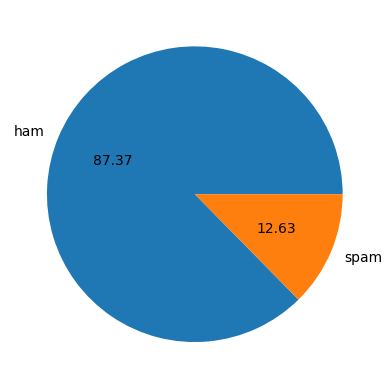

In [154]:
plt.pie(data['target'].value_counts() , labels = ['ham' , 'spam'] , autopct = '%0.2f' )
plt.show()

**Observations**
* Data is out of balance.
* ham messages are 87% and spam are 12% from the dataset

**Importing Natural Language Toolkit**

In [155]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vasanth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [156]:
data['message'].apply(len)
#111 - length interms of characters Count

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

**Counting the Number of Characters, Words, Sentences**

In [157]:
data['char_count'] = data['message'].apply(len)

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_5536\979076205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['char_count'] = data['message'].apply(len)


In [158]:
#Calculating the word count
data['word_count'] = data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.sample()

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_5536\22965706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word_count'] = data['message'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,message,char_count,word_count
722,0,That is wondar full flim.,25,6


In [159]:
data['word_count']
data.sample()

,target,message,char_count,word_count
2157,0,Sad story of a Man - Last week was my b'day. M...,588,154


* nltk word_ tokenize takes te sentenxe and gives the count of words

In [161]:
#Calculating the sentence count
data['sent_count'] = data['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head(2)

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_5536\1232559729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sent_count'] = data['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,message,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


**Descriptive Statistics for Both Ham and Spam**

**Ham Messages Descriptive statistics** 

In [32]:
data[data['target'] == 0].describe()

,target,char_count,word_count,sent_count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


**Spam Messages Descriptive statistics** 

In [33]:
data[data['target'] == 1].describe()

,target,char_count,word_count,sent_count
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


## Data Visualization 

**Character Count Graph**

<Axes: xlabel='char_count', ylabel='Count'>

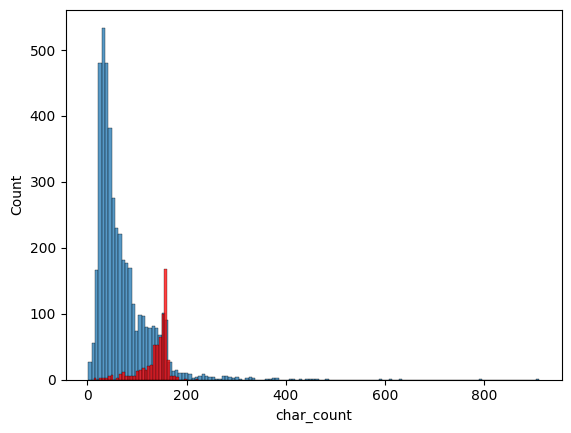

In [34]:
sns.histplot(data[data['target'] == 0]['char_count'])
sns.histplot(data[data['target'] == 1]['char_count'] , color = 'red')

**Word Count Graph**

<Axes: xlabel='word_count', ylabel='Count'>

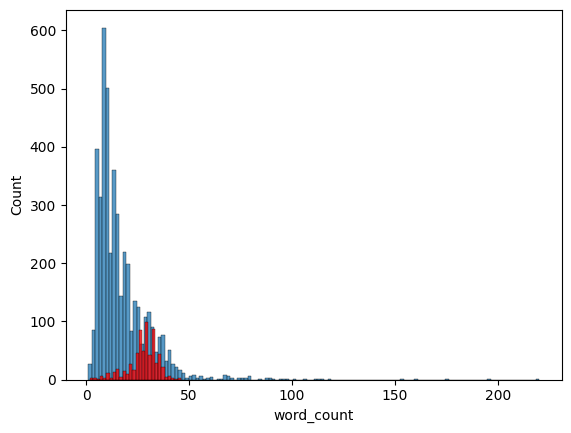

In [35]:
sns.histplot(data[data['target'] == 0]['word_count'])
sns.histplot(data[data['target'] == 1]['word_count'] , color = 'red')

<Axes: xlabel='sent_count', ylabel='Count'>

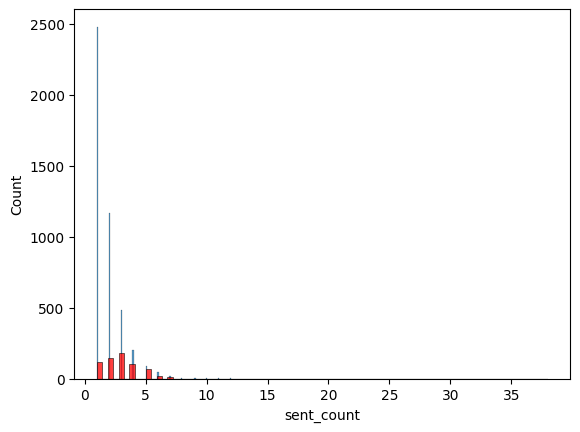

In [36]:
sns.histplot(data[data['target'] == 0]['sent_count'])
sns.histplot(data[data['target'] == 1]['sent_count'] , color = 'red')

In [37]:
data[data['target'] == 0].describe()

,target,char_count,word_count,sent_count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [38]:
data[data['target'] == 1].describe()

,target,char_count,word_count,sent_count
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


**Pair Plot with Target Values**

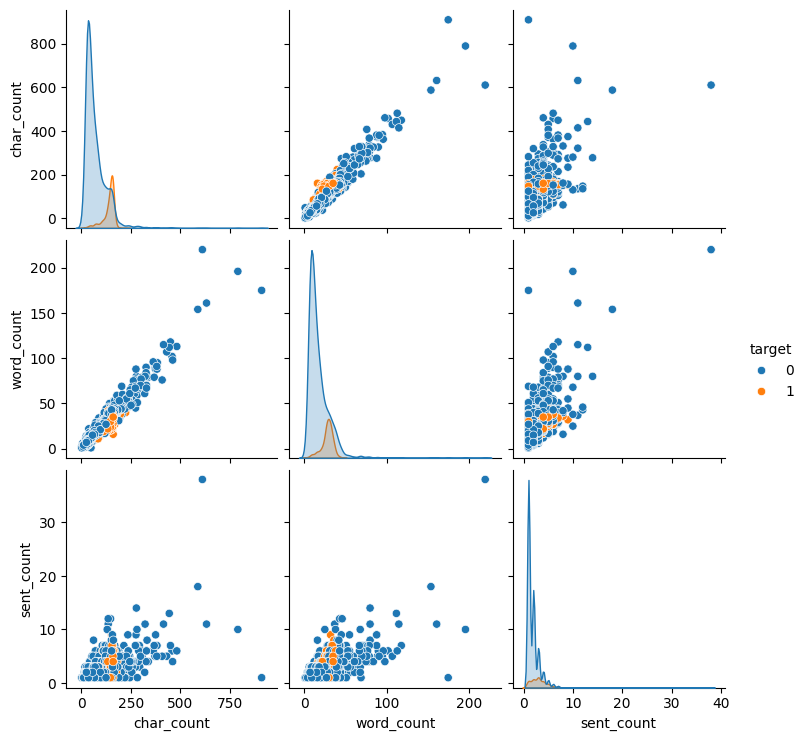

In [163]:
sns.pairplot(data , hue = 'target')

**Heatmap For Correlation in Data**

<Axes: >

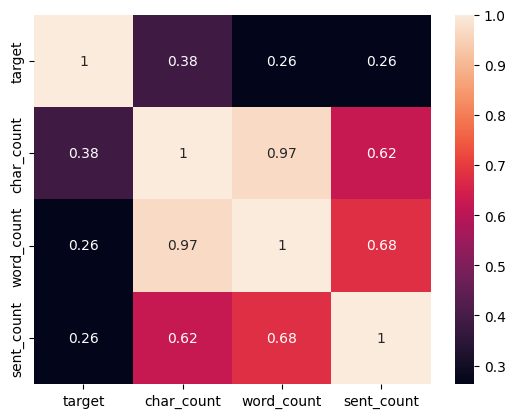

In [40]:
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True)

## Data Preprocessing

1. LowerCase
2. Tokenization
3. Removing Special Characters
4. Removing Stop Words and Punctuation
5. Stemming

**Stop Words :** Stop words like ‘the’, ‘and’, and ‘I’, although common, don’t usually provide meaningful information about a document’s specific topic. By eliminating these words from a corpus, we can more easily identify unique and relevant terms.

In [41]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vasanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
#Example for stopwords :
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
#for Punctuation
import string

In [44]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
#for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

**Porter Stemmer :** The Porter stemming algorithm (or ‘Porter stemmer’) is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.pi"

Original Sentence:
"Stemming is a process that helps in reducing words to their base forms."

Stemmed Sentence:
"Stem is a process that help in reduc word to their base form."

In [46]:
ps.stem('loving')

'love'

In [47]:
def transformation(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    plain_text = []
    for i in message:
        if i.isalnum():
            plain_text.append(i)
    text = plain_text[:] # best method to copy list
    plain_text.clear()

    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            plain_text.append(i)

    text = plain_text[:]
    plain_text.clear()

    for i in text:
        plain_text.append(i)
        
    return " ".join(plain_text)

In [48]:
#Example : 
transformation('Hey Whatsup!')

'hey whatsup'

In [49]:
print(data['message'][0])
transformation(data['message'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [50]:
data['transformed_message'] = data['message'].apply(transformation)

In [51]:
data.head()

,target,message,char_count,word_count,sent_count,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


**Creating Wordcloud for ham and spam**

In [52]:
from wordcloud import WordCloud
wc = WordCloud(height = 500 , width = 500 , min_font_size = 10 , background_color = 'white')

In [53]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_message'].str.cat(sep = " "))

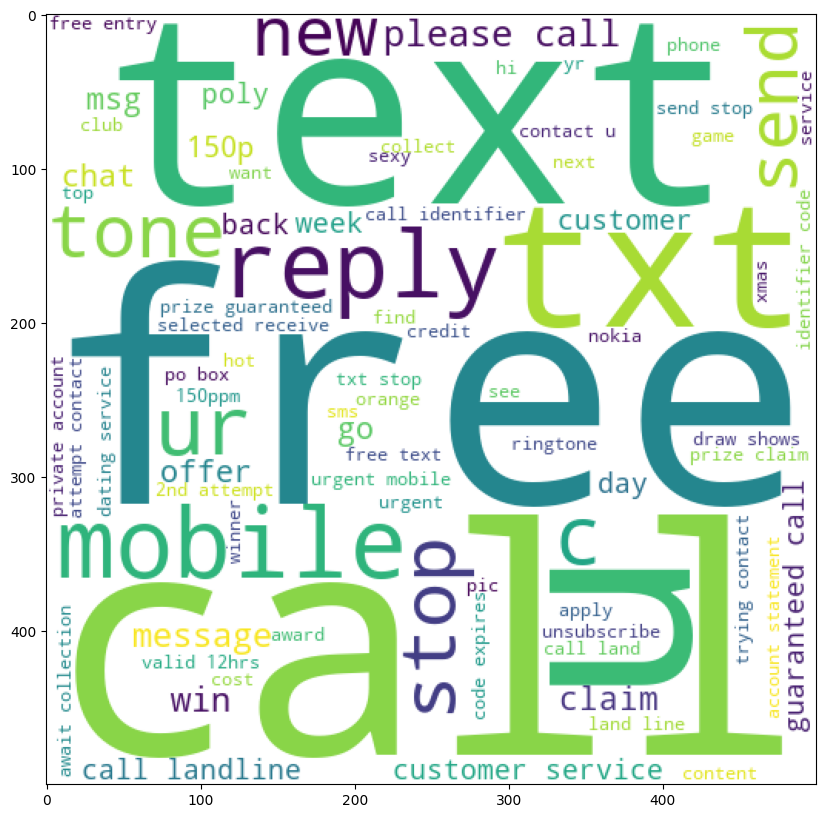

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

In [55]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_message'].str.cat(sep = " "))

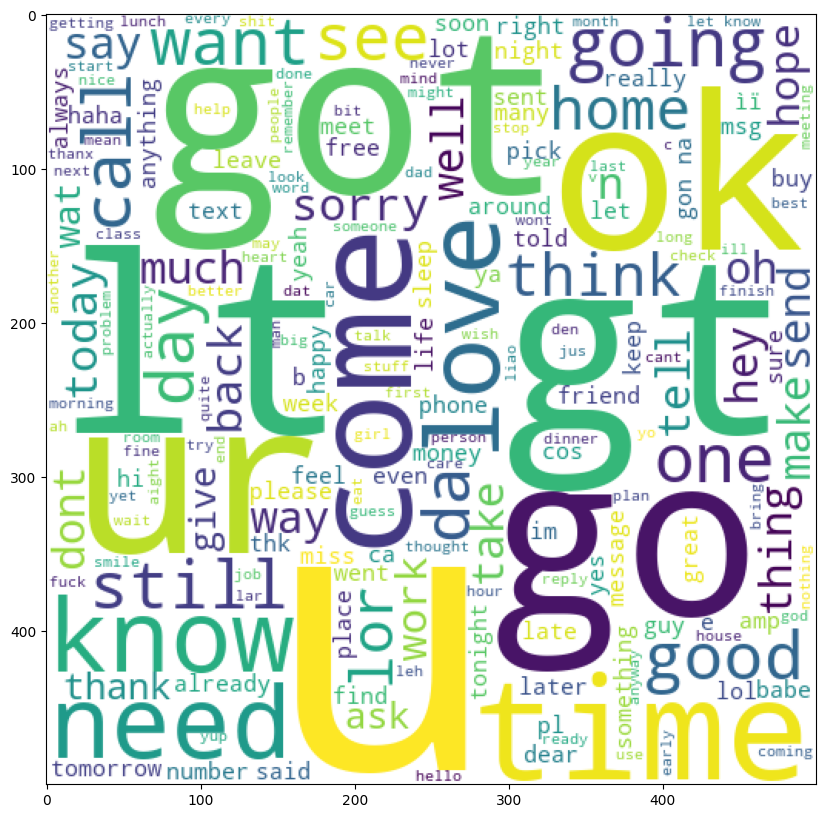

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)
plt.show()

len(spam_words)

In [57]:
from collections import Counter

**Top 30 spam Words**

In [58]:
spam_words = []
for msg in data[data['target'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_words.append(word)        

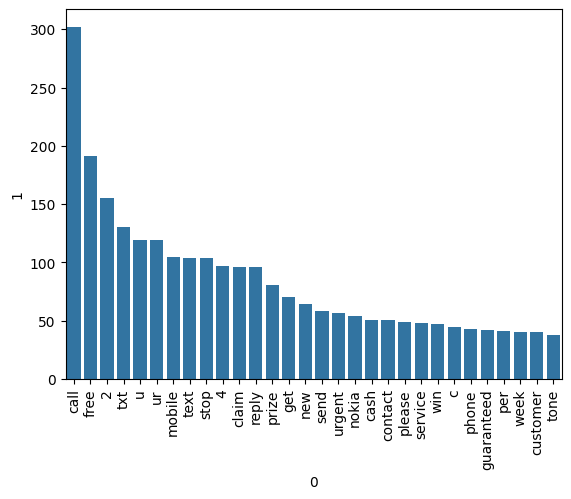

In [59]:
# pd.DataFrame(Counter(spam_words), index=['Count']) #This give single row multiple columns , add.T last for matrix transpose
sns.barplot(x = pd.DataFrame(Counter(spam_words).most_common(30))[0] , y = pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

**Top 30 ham Words**

In [60]:
ham_words = []
for msg in data[data['target'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_words.append(word)        

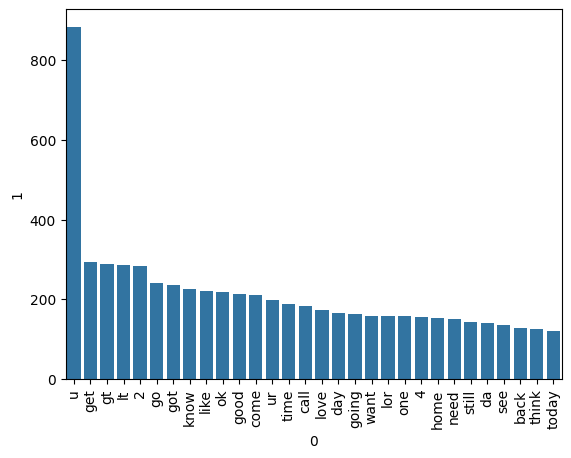

In [61]:
# pd.DataFrame(Counter(ham_words), index=['Count']) This give single row multiple columns , add.T last for matrix transpose
sns.barplot(x = pd.DataFrame(Counter(ham_words).most_common(30))[0] , y = pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [62]:
len(ham_words)

35404

## Model Building

In [63]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [64]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [65]:
type(data['transformed_message'])

pandas.core.series.Series

In [66]:
X = tfidf.fit_transform(data['transformed_message']).toarray()
type(X)

numpy.ndarray

In [67]:
X.shape

(5169, 8002)

In [68]:
y = data['target'].values

In [69]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
from sklearn.metrics import accuracy_score , precision_score ,confusion_matrix

In [73]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print("GNB - Accuracy Score : " , accuracy_score(y_test , y_pred1))
print("GNB - Precision Score : " , precision_score(y_test , y_pred1))
print("GNB - Confusion Matrix : " , confusion_matrix(y_test , y_pred1))


GNB - Accuracy Score :  0.8936170212765957
GNB - Precision Score :  0.5707070707070707
GNB - Confusion Matrix :  [[811  85]
 [ 25 113]]


In [74]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print("MNB - Accuracy Score : " , accuracy_score(y_test , y_pred2))
print("MNB - Precision Score : " , precision_score(y_test , y_pred2))
print("MNB - Confusion Matrix : " , confusion_matrix(y_test , y_pred2))


MNB - Accuracy Score :  0.9535783365570599
MNB - Precision Score :  1.0
MNB - Confusion Matrix :  [[896   0]
 [ 48  90]]


In [75]:

bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print("BNB - Accuracy Score : " , accuracy_score(y_test , y_pred3))
print("BNB - Precision Score : " , precision_score(y_test , y_pred3))
print("BNB - Confusion Matrix : " , confusion_matrix(y_test , y_pred3))

BNB - Accuracy Score :  0.9680851063829787
BNB - Precision Score :  0.9646017699115044
BNB - Confusion Matrix :  [[892   4]
 [ 29 109]]


In [76]:
X_tf = tfidf.fit_transform(data['transformed_message']).toarray()

In [77]:
X_train_tf , X_test_tf , y_train , y_test = train_test_split(X_tf , y , test_size = 0.2 , random_state=2)

In [78]:
gnb.fit(X_train_tf , y_train)
y_pred_tf_1 = gnb.predict(X_test_tf)
print("GNB - Accuracy Score : " , accuracy_score(y_test , y_pred_tf_1))
print("GNB - Precision Score : " , precision_score(y_test , y_pred_tf_1))
print("GNB - Confusion Matrix : " , confusion_matrix(y_test , y_pred_tf_1))


GNB - Accuracy Score :  0.8936170212765957
GNB - Precision Score :  0.5707070707070707
GNB - Confusion Matrix :  [[811  85]
 [ 25 113]]


In [79]:
mnb.fit(X_train_tf , y_train)
y_pred_tf_2 = mnb.predict(X_test_tf)
print("MNB - Accuracy Score : " , accuracy_score(y_test , y_pred_tf_2))
print("MNB - Precision Score : " , precision_score(y_test , y_pred_tf_2))
print("MNB - Confusion Matrix : " , confusion_matrix(y_test , y_pred_tf_2))


MNB - Accuracy Score :  0.9535783365570599
MNB - Precision Score :  1.0
MNB - Confusion Matrix :  [[896   0]
 [ 48  90]]


In [80]:
bnb.fit(X_train_tf , y_train)
y_pred_tf_3 = bnb.predict(X_test_tf)
print("BNB - Accuracy Score : " , accuracy_score(y_test , y_pred_tf_3))
print("BNB - Precision Score : " , precision_score(y_test , y_pred_tf_3))
print("BNB - Confusion Matrix : " , confusion_matrix(y_test , y_pred_tf_3))


BNB - Accuracy Score :  0.9680851063829787
BNB - Precision Score :  0.9646017699115044
BNB - Confusion Matrix :  [[892   4]
 [ 29 109]]


* Precision Score is makes more important role not accuracy as data is imbalance

**Machine Learning Models Used :**
* NaiveBayes - Guassian , Multinomial , Bernoulli 
* Logistic Regression
* Support Vector Machine (SVM)
* Decision Tree Classifier
* K-Nearest Neighbors (KNN)
* Random Forest Classifier
* AdaBoost Classifier
* Bagging Classifier
* Extra Trees Classifier
* Gradient Boosting Classifier
* XGBoost Classifier

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [165]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [166]:
def train_model(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [167]:
train_model(svc,X_train_tf,y_train,X_test_tf,y_test)

(0.9729206963249516, 0.9741379310344828)

In [168]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_model(clf, X_train_tf,y_train,X_test_tf,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.8984526112185687
Precision -  1.0
For  MNB
Accuracy -  0.9535783365570599
Precision -  1.0
For  DT
Accuracy -  0.941972920696325
Precision -  0.8611111111111112
For  LR
Accuracy -  0.941972920696325
Precision -  0.9148936170212766
For  RF
Accuracy -  0.9729206963249516
Precision -  1.0
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9090909090909091
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8818897637795275
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9448742746615088
Precision -  0.8857142857142857
For  xgb
Accuracy -  0.97678916827853
Precision -  0.9596774193548387


In [169]:
performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [88]:
performance.head()

,Algorithm,Accuracy,Precision
1,KN,0.898453,1.000000
2,NB,0.953578,1.000000
5,RF,0.972921,1.000000
8,ETC,0.976789,0.991379
0,SVC,0.972921,0.974138


In [171]:
performance_new = pd.melt(performance, id_vars = "Algorithm")

In [172]:
performance_new.head()

,Algorithm,variable,value
0,KN,Accuracy,0.898453
1,MNB,Accuracy,0.953578
2,RF,Accuracy,0.972921
3,ETC,Accuracy,0.976789
4,SVC,Accuracy,0.972921


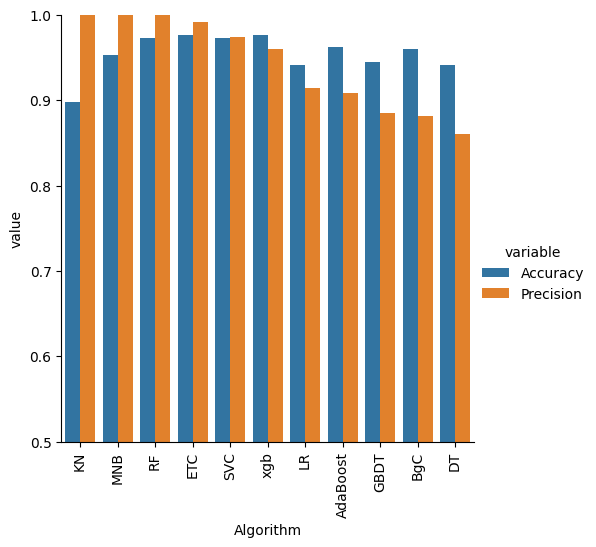

In [173]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_new, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Testing the Model

In [174]:
user_input = input('Enter the message you want to check ?')
ui_stemmer = transformation(user_input)
ui_token = tfidf.transform([ui_stemmer]).toarray()
output = mnb.predict(ui_token)
if output[0] == 1:
    print("Its Spam , Get Some Help")
else:
        print("Not Spam")

Enter the message you want to check ? SIX chances to win CASH! From 100 to 20,000 pounds


Its Spam , Get Some Help
